# Qiskit Hands-On 1 — X, H, Z, CNOT, Bell state

## N.B: for execute on real IMB Quantum hardware you need to put the API token, I will not share the mine, otherwise, if the simulation is enough everything should work correct.



In [ ]:
from qiskit.providers import BackendV2
!pip install qiskit qiskit-aer matplotlib pylatexenc -q --no-build-isolation --use-pep517


In [ ]:
import qiskit
print(qiskit.__version__)
%matplotlib inline

In [ ]:
# Import principali
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
import matplotlib.pyplot as plt


### 1) Circuiti semplici: X, H, Z
- Per ogni circuito costruiremo la versione con misura per il qasm-simulator
- per H e Z mostreremo anche lo statevector per comprendere l'effetto di fase


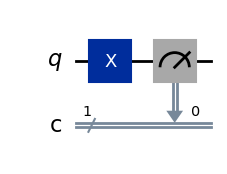

In [6]:
# Circuit X
#for the X gate we can use only one qubit and save his result in one bit
qc_x = QuantumCircuit(1, 1)
qc_x.x(0)  #apply x gate on the qubit
#measure the qubit and save in the bit the result
qc_x.measure(0, 0)
#draw the circuit with matplotlib
qc_x.draw('mpl')


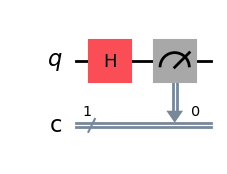

In [7]:
# Circuit H (Hadamard)
qc_h = QuantumCircuit(1, 1)
qc_h.h(0)
qc_h.measure(0, 0)
qc_h.draw('mpl')


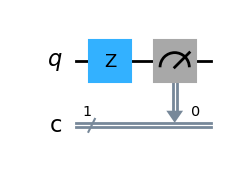

In [8]:
# Circuito Z
# Z apply a phase -1 on the state |1>. Misure on the computational basis |0> there is no change.
# For see the change of phase we show the statevector and we will prepare the state |+>.
qc_z = QuantumCircuit(1, 1)
qc_z.z(0)
qc_z.measure(0, 0)
qc_z.draw('mpl')


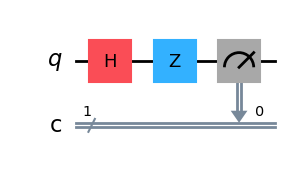

In [9]:
# Statevector for Z applied at |+> (prepariamo |+>, applichiamo Z, vediamo la fase)
qc_h_z = QuantumCircuit(1, 1)
qc_h_z.h(0)
qc_h_z.z(0)
qc_h_z.measure(0, 0)
qc_h_z.draw('mpl')

# 2) Simulazione:
 - I will  AerSimulator for execute both the statevector and the qasm (misures)

Statevector dopo H:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


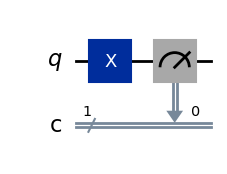

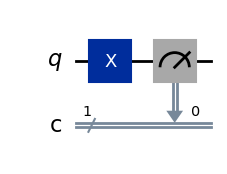

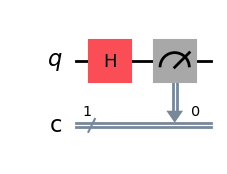

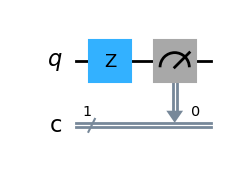

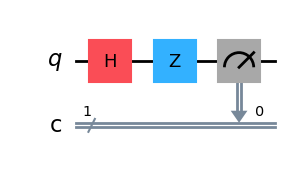

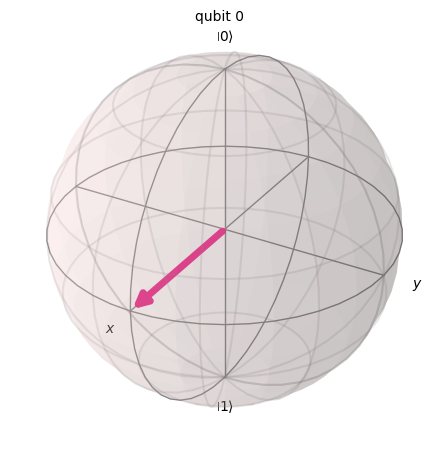

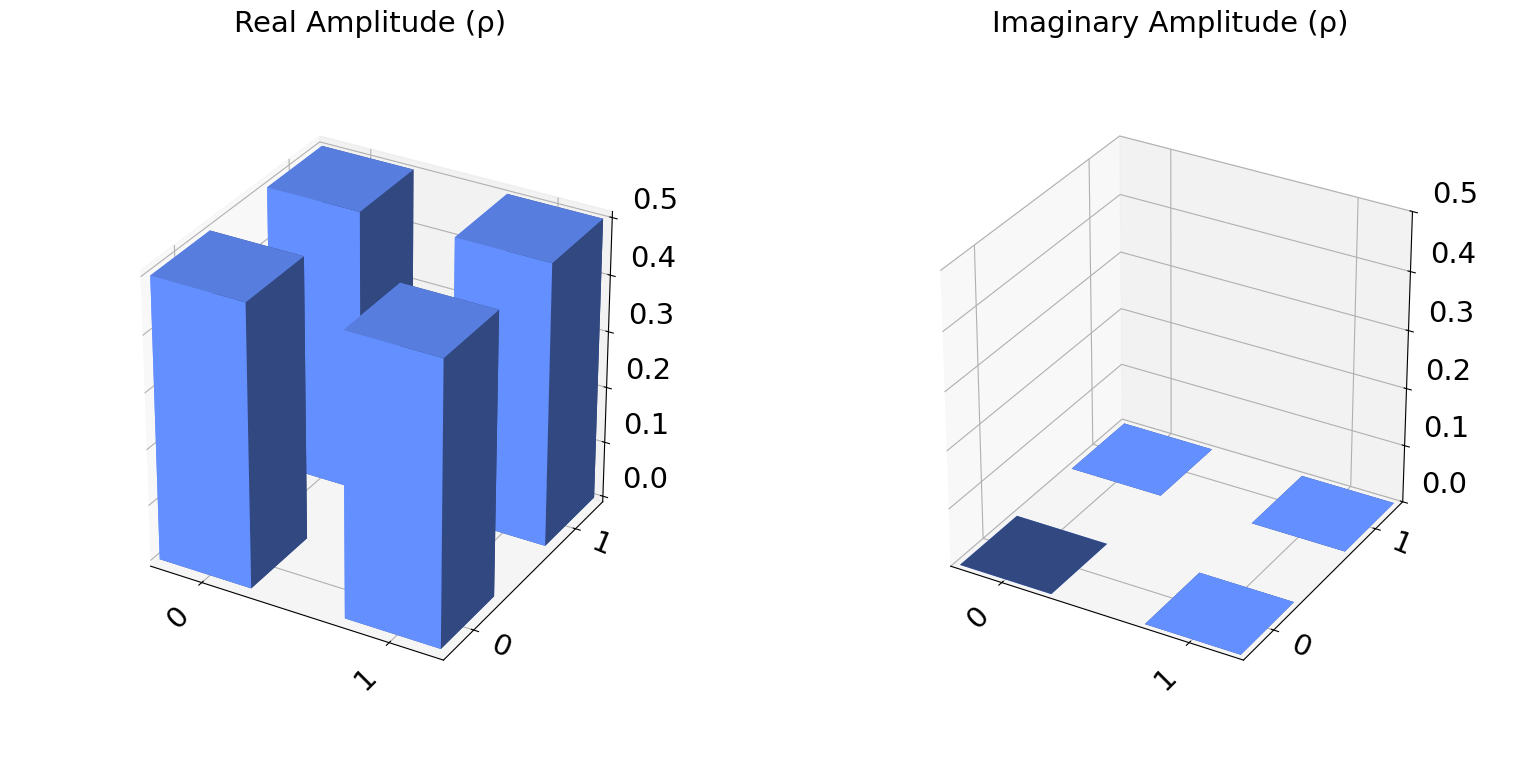

In [10]:
from qiskit_aer import AerSimulator
sim = AerSimulator()

# Statevector per H (|0> -> |+>)
sv_h = Statevector.from_label('0').evolve(qc_h.remove_final_measurements (inplace=False))
print('Statevector dopo H:')
print(sv_h)

# Plot Bloch + city
fig = plot_bloch_multivector(sv_h.data)
plt.show()
fig = plot_state_city(sv_h.data)
plt.show()


### Apply only the Z gate on |0> state has no effect

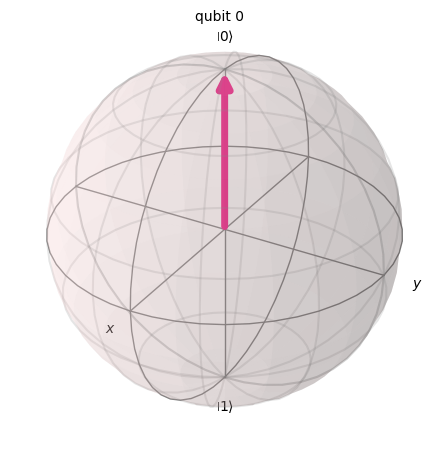

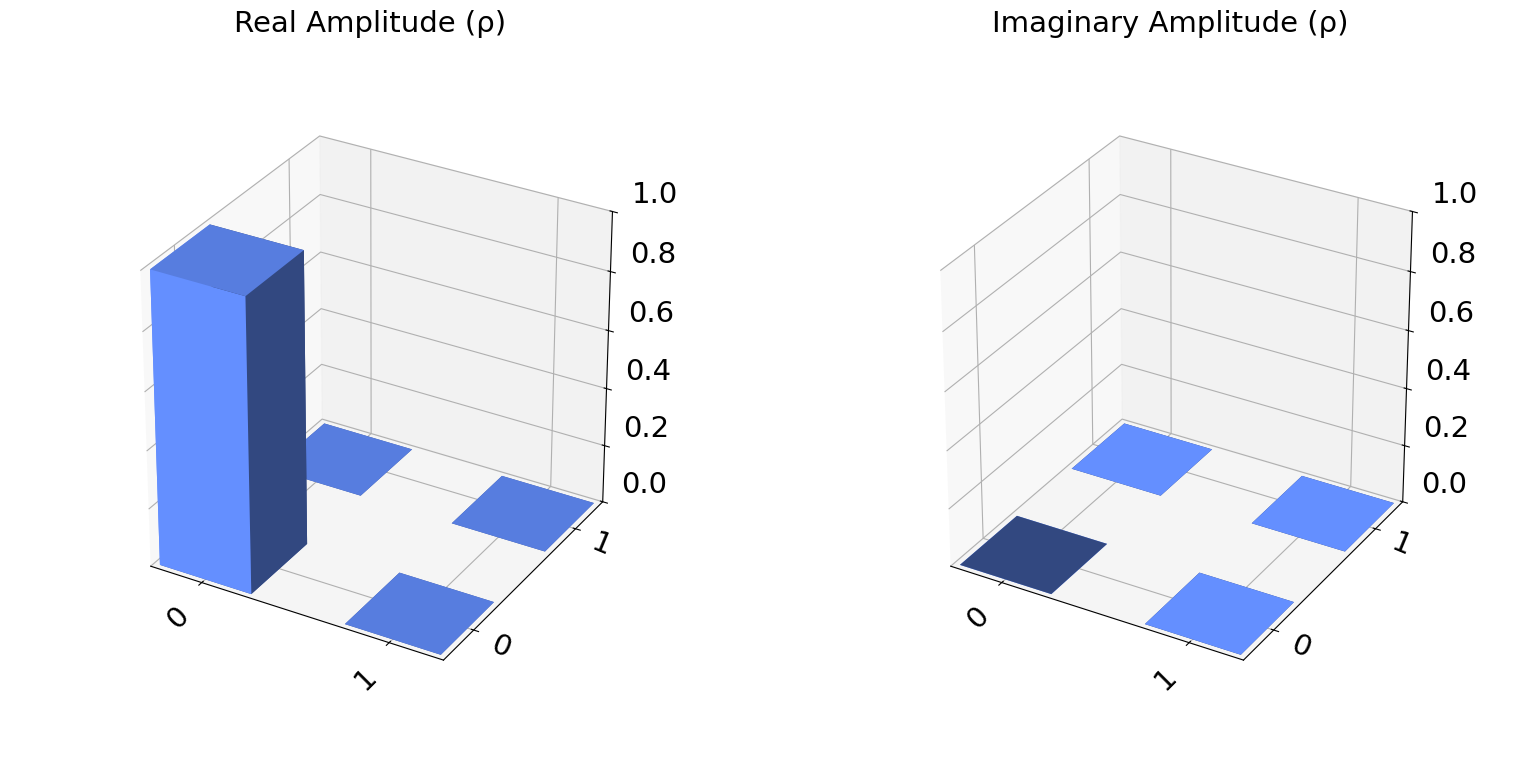

In [11]:
# non misuriamo per ottenere lo statevector
sv_z = Statevector.from_label('0').evolve(qc_z.remove_final_measurements(inplace=False)) #without h before
fig = plot_bloch_multivector(sv_z.data)
plt.show()
fig = plot_state_city(sv_z.data)
plt.show()

### apply the H gate and after the Z gate will flip the phase of the |1> state

Statevector di |+> dopo Z:
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


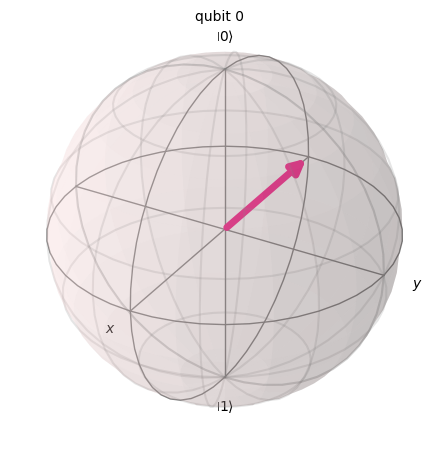

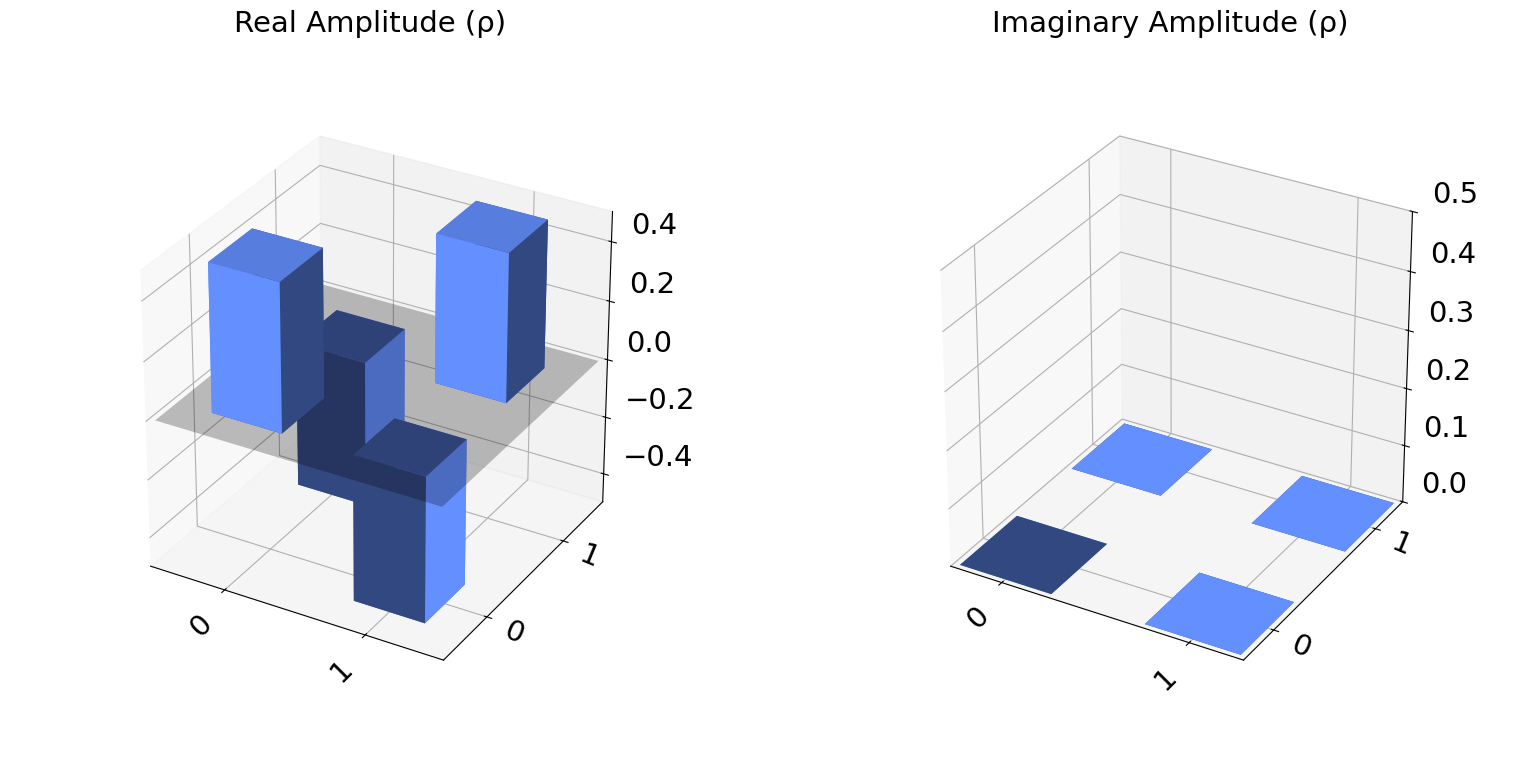

In [12]:
sv_h_z = Statevector.from_label('0').evolve(qc_h_z.remove_final_measurements(inplace=False))
print('Statevector di |+> dopo Z:')
print(sv_h_z)
fig = plot_bloch_multivector(sv_h_z.data)
plt.show()
fig = plot_state_city(sv_h_z.data)
plt.show()


Counts X:  {'1': 1024}


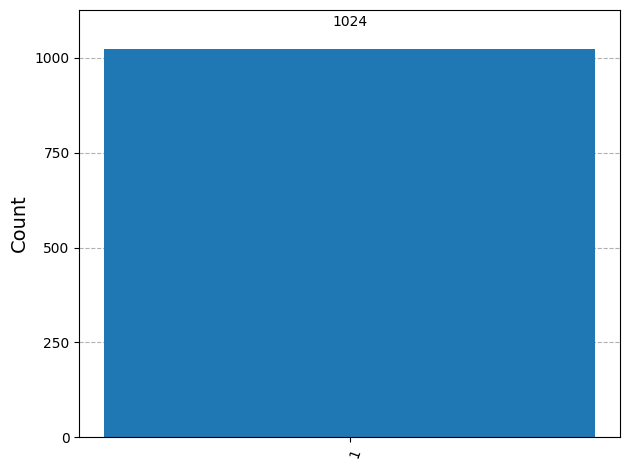

Counts H:  {'1': 525, '0': 499}


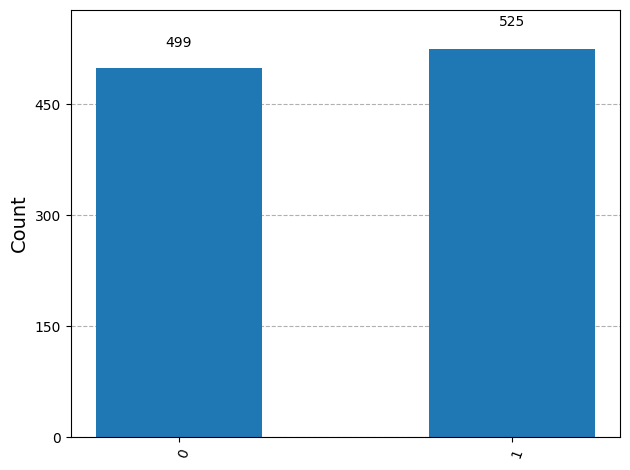

Counts Z:  {'0': 1024}


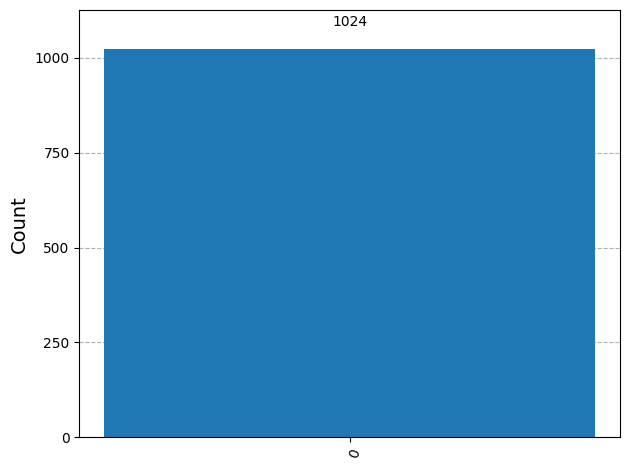

Counts H and Z:  {'0': 520, '1': 504}


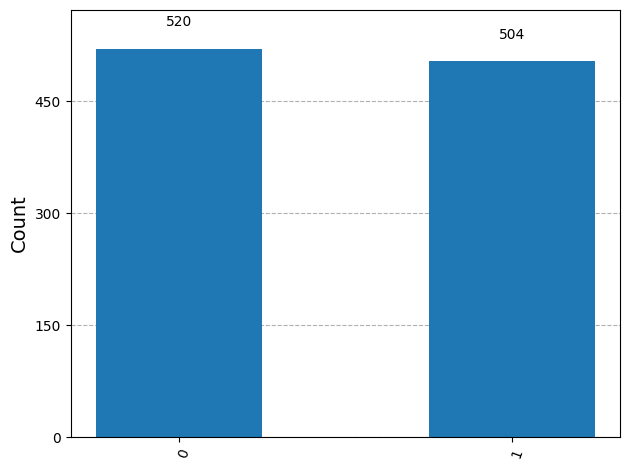

In [13]:
# Eseguire i circuiti misurati con il qasm simulator

# Usa AerSimulator
backend_qasm = AerSimulator()

# Transpile il circuito per il backend scelto
tqc_x = transpile(qc_x, backend_qasm)
tqc_h = transpile(qc_h, backend_qasm)
tqc_z = transpile(qc_z, backend_qasm)
tqc_h_z = transpile(qc_h_z, backend_qasm)
# X
job_x = backend_qasm.run(tqc_x, shots=1024)
res_x = job_x.result()
counts_x = res_x.get_counts()
print('Counts X: ', counts_x)
plot_histogram(counts_x)
plt.show()

# H
job_h = backend_qasm.run(tqc_h, shots=1024)
res_h = job_h.result()
counts_h = res_h.get_counts()
print('Counts H: ', counts_h)
plot_histogram(counts_h)
plt.show()

# Z
job_z = backend_qasm.run(tqc_z, shots=1024)
res_z = job_z.result()
counts_z = res_z.get_counts()
print('Counts Z: ', counts_z)
plot_histogram(counts_z)
plt.show()
# H e Z
job_h_z = backend_qasm.run(tqc_h_z, shots=1024)
res_h_z = job_h_z.result()
counts_h_z = res_h_z.get_counts()
print('Counts H and Z: ', counts_h_z)
plot_histogram(counts_h_z)
plt.show()


### 3) CNOT e Bell state
 - Circuit with 2-qubit with H on q0 and CX(q0,q1) for have a Bell state (|00> + |11>)/sqrt(2)
 - Measure both the qubits and see the counts

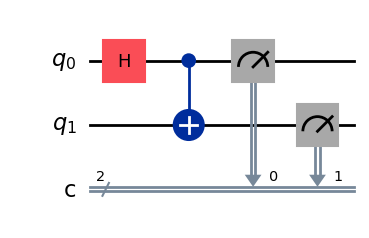

In [14]:
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)
qc_bell.cx(0, 1)
qc_bell.measure([0, 1], [0, 1])
qc_bell.draw('mpl')


Counts Bell (simulator): {'11': 1020, '00': 1028}


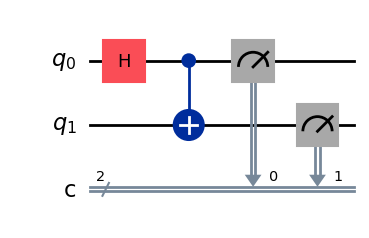

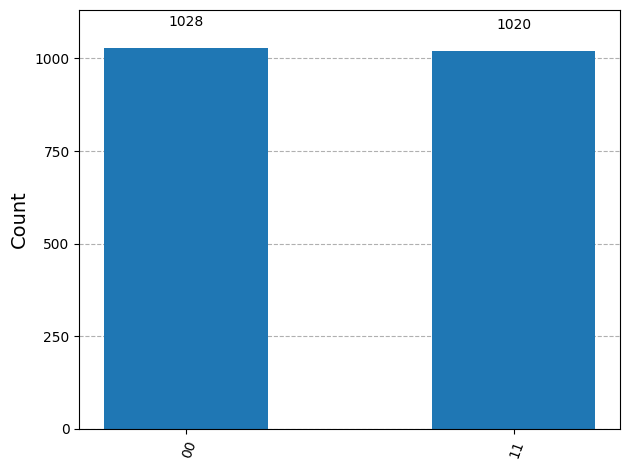

In [15]:
# Simulazione qasm per Bell
tqc_bell = transpile(qc_bell, backend_qasm)
job_bell = backend_qasm.run(tqc_bell, shots=2048)
res_bell = job_bell.result()
counts_bell = res_bell.get_counts()
print('Counts Bell (simulator):', counts_bell)
plot_histogram(counts_bell)
plt.show()


### 4) Confronto simulatore (ideale) vs simulatore rumoroso basato su backend reale
- Use a noise model for simulate noise in the operations
- It require an IBMQ account for the properties of the backend)

In [ ]:
!pip install qiskit-ibm-runtime qiskit-ibm-transpiler python-dotenv --use-pep517

In [16]:
#  noise model from a backend of IBM Quantum (free)
import os
from dotenv import load_dotenv
from qiskit_ibm_runtime import QiskitRuntimeService
load_dotenv()
IBMQ_TOKEN = os.getenv("IBMQ_TOKEN", None)
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    name='default-ibm-quantum',
    token=IBMQ_TOKEN,
    overwrite=True
)
service = QiskitRuntimeService(
    channel="ibm_quantum_platform",
)

backends = service.backends()
print(backends)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]


ibm_torino
Counts Bell (noisy simulator): {'01': 172, '10': 160, '11': 846, '00': 870}


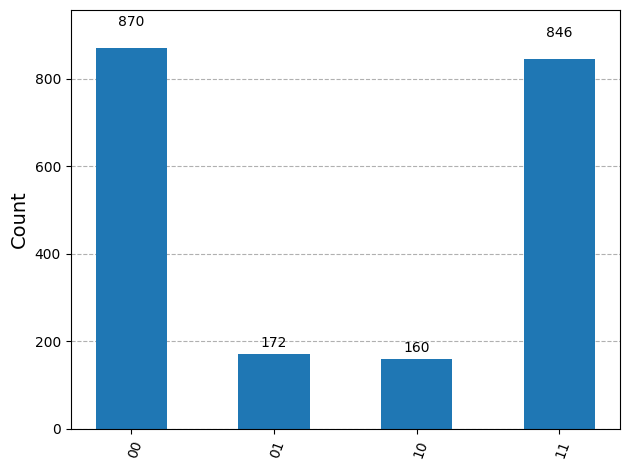

In [18]:
# update the backend with the one of our instance on ibm quantum
backend_ibm = service.least_busy()
print(backend_ibm.name)
from qiskit_aer.noise import NoiseModel
noise_model = NoiseModel.from_backend(backend_ibm)
simulator_noisy = AerSimulator(noise_model=noise_model)
tqc_bell_noise = transpile(qc_bell, simulator_noisy)
job_noisy = simulator_noisy.run(tqc_bell_noise, shots=2048)
res_noisy = job_noisy.result()
counts_noisy = res_noisy.get_counts()
print('Counts Bell (noisy simulator):', counts_noisy)
plot_histogram(counts_noisy)
plt.show()

### 5) Esecuzione su hardware reale IBM Quantum


In [19]:
# Target properties
print("Supported Gate:", backend_ibm.basis_gates)  # elenco di gate supportati
print("Mappa di accoppiamento CNOT:", backend_ibm.coupling_map)
print("Qubit disponibili:", backend_ibm.num_qubits)

Supported Gate: ['cz', 'id', 'rz', 'sx', 'x']
Mappa di accoppiamento CNOT: [[0, 1], [0, 15], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 5], [4, 16], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [8, 7], [8, 9], [8, 17], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [12, 11], [12, 13], [12, 18], [13, 12], [13, 14], [14, 13], [15, 0], [15, 19], [16, 4], [16, 23], [17, 8], [17, 27], [18, 12], [18, 31], [19, 15], [19, 20], [20, 19], [20, 21], [21, 20], [21, 22], [21, 34], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 35], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 36], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 37], [34, 21], [34, 40], [35, 25], [35, 44], [36, 29], [36, 48], [37, 33], [37, 52], [38, 39], [38, 53], [39, 38], [39, 40], [40, 34], [40, 39], [40, 41], [41, 40], [41, 42], [42, 41], [42, 43], [42, 54], [43, 42]

In [ ]:
from qiskit_ibm_runtime import SamplerV2
tqc_bell_real = transpile(qc_bell, backend=backend_ibm, optimization_level=3)

sampler = SamplerV2(mode=backend_ibm)
#iterator of circuits
job_real = sampler.run([tqc_bell_real], shots=2048)

result_real = job_real.result()
print(result_real)

In [ ]:
#result of  circuit
pub_result = result_real[0]
# I bit per ciascun shot
bit_array = pub_result.data.c
# Converte BitArray in lista di stringhe '00', '01', ...
bitstrings = [format(int(''.join(map(str, b))), f'0{bit_array.num_bits}b') for b in bit_array.array.tolist()]

#bitstrings = [''.join(map(str, b)) for b in bit_array.array.tolist()]
# Conta le occorrenze come prima
from collections import Counter
counts_real = dict(Counter(bitstrings))
print("Counts Bell (real hardware):", counts_real)
plot_histogram(counts_real)
plt.show()